In [2]:
def split_str(original_string,delimiter = '_'):
    
    first_occurrence_index = original_string.find(delimiter)
    if first_occurrence_index == -1:
        return ""  # Character not found at all

    second_occurrence_index = original_string.find(delimiter, first_occurrence_index + 1)
    if second_occurrence_index == -1:
        return ""  # Only one occurrence found

    return original_string[second_occurrence_index + 1:-14]

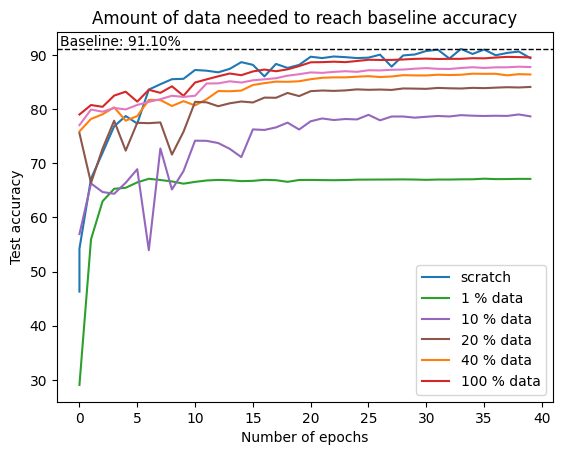

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots()

directory_path = '/kaggle/input/csv-files'
max_epochs = 40
figureName = 'data regime' 


for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        res = pd.read_csv(file_path, sep =',')
        
        for num in [0.01,0.1,0.2,0.4,0.6,1.0]:
            label = str(int(num*100))+' % data'
            if str(num) in file_path: 
                #train_accuracy = res['train acc'][:max_epochs].values
                test_accuracy = res['val acc'].values
                ax.plot(res['epoch'].values, test_accuracy, label=label)
                #ax.plot(res['epoch'].values, res['train acc'].values)
        if 'scratch' in file_path:
            label = 'scratch'
            test_accuracy = res['test acc'].values
            max_scratch = (max(test_accuracy))
            ax.plot(res['epoch'].values, test_accuracy, label=label)
ax.axhline(y=max_scratch, color='black', linestyle='--', linewidth=1)
ax.text(
    x=0.25,  # X-coordinate in axis fraction (right side)
    y=max_scratch,  # Y-coordinate at the line
    s=f"Baseline: {max_scratch:.2f}%",  # Annotation text
    va='bottom', ha='right',  # Vertical and horizontal alignment
    transform=ax.get_yaxis_transform(),  # So y is in data coords, x in axis coords
    fontsize=10, color='black'
)
ax.set_title(f'Amount of data needed to reach baseline accuracy')
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test accuracy')
handles, labels = ax.get_legend_handles_labels()
order = [0, 2, 4, 5, 1, 3]  # Swap the first and second legend entries
ax.legend([handles[i] for i in order], [labels[i] for i in order])

plt.savefig(f'/kaggle/working/{figureName}.png')
plt.show()

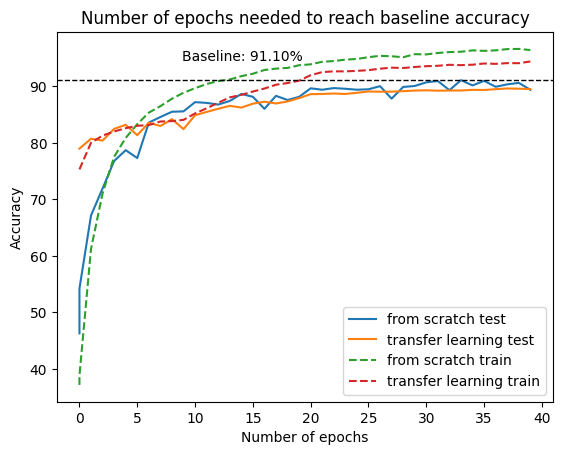

In [8]:
figureName = 'epochs comparison'
res_full_data = pd.read_csv('/kaggle/input/csv-files/ResNet_finetuned_1.0.csv', sep =',', encoding='utf-8')
scratch_data = pd.read_csv('/kaggle/input/csv-files/ResNet_scratch.csv', sep =',')
plt.plot(scratch_data['epoch'].values, scratch_data['test acc'].values, label='from scratch test')
plt.plot(res_full_data['epoch'].values, res_full_data['val acc'].values, label='transfer learning test')
plt.plot(scratch_data['epoch'].values, scratch_data['train acc'].values, label='from scratch train', linestyle='--')
plt.plot(res_full_data['epoch'].values, res_full_data['train acc'].values, label='transfer learning train',linestyle='--')
max_scratch = (max(scratch_data['test acc'].values))
plt.axhline(y=max_scratch, color='black', linestyle='--', linewidth=1)
plt.text(
    x=0.45,  # X-coordinate in axis fraction (right side)
    y=round(max_scratch,2),  # Y-coordinate at the line
    s=f"Baseline: {max_scratch:.2f}%",  # Annotation text
    va='top', ha='right',  # Vertical and horizontal alignment
    transform=ax.get_yaxis_transform(),  # So y is in data coords, x in axis coords
    fontsize=10, color='black'
)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title(f'Number of epochs needed to reach baseline accuracy')
plt.legend()
plt.savefig(f'/kaggle/working/{figureName}.png')
plt.show()